# Linear Regression em Scikit-learn
***

Quando estamos fazendo machine learning, estamos interessados em selecionar o modelo que minimiza o erro nos dados disponíveis. 

O problema de achar os melhores parâmetros para a combinação linear que representa o modelo com o menor erro possível. A achar a forma fechada da solução que minimiza o erro, é implementada no Scikit-learn.

## Problema:
***

Treinar um modelo que representa a relação linear entre features e vetor alvo (target).

In [1]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")
feature_names = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_names]], penguins[target_name]

data.head()

,Flipper Length (mm)
0,181.0
1,186.0
2,195.0
3,193.0
4,190.0


In [2]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [3]:
model = linear_regression
print("Os parâmetros do modelo são:")
for parameter in model.get_params():
    print(f"{parameter}")

Os parâmetros do modelo são:
copy_X
fit_intercept
n_jobs
normalize
positive


A instância da classe linear_regression irá gravar os valores nos atributos coef_ e intercept_. Podemos checar os valores ótimos do modelo encontrado, usando:

$y = ax + b$
* a = linear_regression_[0] # se tiver mais features será um vetor = data.shape[1]
* b = linear_regression.intercept_

In [4]:
# peso do coeficiente 
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610011

In [5]:
# intercept ou bias 
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

A regressão linear assume que a relação entre as features, e a variável target é aproximadamente linear. Isto é o efeito dos coeficientes (pesos ou parâmetros) das features no vetor target é constante. 

In [6]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

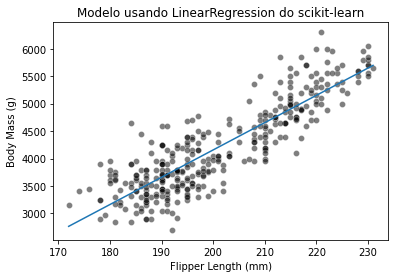

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_names], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Modelo usando LinearRegression do scikit-learn")

In [8]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"O erro quadrático médio do modelo otimizado é {model_error:.2f}")

O erro quadrático médio do modelo otimizado é 154546.19


Um modelo de regressão linear minimiza o erro médio quadrático no conjunto de treinamento. Isto significa que os parâmetros obtidos após o fit(isto é: coef_ e o intercept_) são parâmetros otimizados que minimizam o erro médio quadrático. Em outras palavras, qualquer outra escolha para os coeficientes para o modelo irá resultar em um erro maior no conjunto de treinamento. Contudo essa métrica é um pouco complicada de interpretar.

In [9]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"A média absoluta do erro do modelo otimizado é: {model_error:.2f} g")

A média absoluta do erro do modelo otimizado é: 313.00 g


A média absoluta do erro de 313 gramas significa que em média, o nosso modelo erra por $\pm 313$ g a massa do penguim, dado que o tamanho do seu flipper.